In [1]:
import os, sys, time

HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh
import umap, numpy as np, pandas as pd, scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 0 # 3

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["brain"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

  Geneformer, 512
     Harmony, 50
    Islander, 16
Islander_UMAP, 2
     PCA_Raw, 50
   Scanorama, 100
UMAP_Provided, 2
    UMAP_Raw, 2
     X_bbknn, 2
       X_pca, 50
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2
tSNE_Provided, 2


In [3]:
adata

AnnData object with n_obs × n_vars = 839273 × 42079
    obs: 'ROIGroup', 'ROIGroupCoarse', 'ROIGroupFine', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_condition', 'log1p', 'neighbors', 'pca', 'schema_ver

In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)

In [4]:
adata

AnnData object with n_obs × n_vars = 839273 × 1000
    obs: 'ROIGroup', 'ROIGroupCoarse', 'ROIGroupFine', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manage

In [5]:
del adata.obsm

In [ ]:
adata.write(rf"{dh.DATA_DIR}/brain/emb_hvg.h5ad", compression="gzip")

In [ ]:
adata

### Process Raw

In [4]:
_s = time.time()
adata = sc.read_h5ad(dh.DATA_RAW_["brain"])
print("it takes %.2f minutes" % ((time.time() - _s) / 60))

it takes 0.87 minutes


In [5]:
adata

AnnData object with n_obs × n_vars = 888263 × 59357
    obs: 'ROIGroup', 'ROIGroupCoarse', 'ROIGroupFine', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_condition', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'

In [ ]:
adata = sc.read_h5ad(dh.DATA_RAW_["brain"])
print("it takes %.2f minutes" % ((time.time() - _s) / 60))

In [18]:
for min_cells in [5, 10, 100]:
    for min_genes in [500, 1000]:
        for min_counts in [1000, 5000]:
            print(rf"min_cells: {min_cells}; min_genes: {min_genes}; min_counts: {min_counts}")
            adata = sc.read_h5ad(dh.DATA_RAW_["brain"])
            _ = uh.preprocess(adata, min_cells=min_cells, min_genes=min_genes, min_counts=min_counts)
            print("\n\n")

min_cells: 5; min_genes: 500; min_counts: 1000
42135 genes x 885790 cells after quality control.



min_cells: 5; min_genes: 500; min_counts: 5000
40843 genes x 345182 cells after quality control.



min_cells: 5; min_genes: 1000; min_counts: 1000
42079 genes x 839273 cells after quality control.



min_cells: 5; min_genes: 1000; min_counts: 5000
40843 genes x 345182 cells after quality control.



min_cells: 10; min_genes: 500; min_counts: 1000
40114 genes x 885790 cells after quality control.



min_cells: 10; min_genes: 500; min_counts: 5000
38772 genes x 345182 cells after quality control.



min_cells: 10; min_genes: 1000; min_counts: 1000
40068 genes x 839273 cells after quality control.



min_cells: 10; min_genes: 1000; min_counts: 5000
38772 genes x 345182 cells after quality control.



min_cells: 100; min_genes: 500; min_counts: 1000
32851 genes x 885790 cells after quality control.



min_cells: 100; min_genes: 500; min_counts: 5000
31182 genes x 345182 cells after quality 

In [20]:
adata = sc.read_h5ad(dh.DATA_RAW_["brain"])
adata = uh.preprocess(adata, min_cells=5, min_genes=1000, min_counts=1000)

sc.settings.verbosity = 3
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata)

42079 genes x 839273 cells after quality control.
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:09:08)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:11:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:16:53)


In [22]:
adata.obsm

AxisArrays with keys: X_UMAP, X_tSNE, X_pca, X_umap

In [23]:
adata.obsm["UMAP_Provided"] = adata.obsm["X_UMAP"]
adata.obsm["tSNE_Provided"] = adata.obsm["X_tSNE"]
adata.obsm["UMAP_Raw"] = adata.obsm["X_umap"]
adata.obsm["PCA_Raw"] = adata.obsm["X_pca"]

del adata.obsm["X_UMAP"]
del adata.obsm["X_tSNE"]
del adata.obsm["X_umap"]
del adata.obsm["X_pca"]

In [27]:
adata.var.index

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000288596', 'ENSG00000288597', 'ENSG00000288598',
       'ENSG00000288600', 'ENSG00000288605', 'ENSG00000288611',
       'ENSG00000288612', 'ENSG00000288632', 'ENSG00000288642',
       'ENSG00000288643'],
      dtype='object', name='ensembl_ids', length=42079)

In [28]:
adata.var.index = adata.var["feature_name"].values.tolist()

In [32]:
adata.write(rf"{dh.DATA_DIR}/Brain/emb.h5ad", compression="gzip")

### Now we check the typical attributes

In [2]:
adata = sc.read_h5ad(rf"{dh.DATA_DIR}/Brain/emb.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 839273 × 42079
    obs: 'ROIGroup', 'ROIGroupCoarse', 'ROIGroupFine', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'batch_condition', 'log1p', 'neighbors', 'schema_version', 'title', 'umap'
    obsm: 'PCA_Raw', 'UMAP_Provided', 'UMAP_Raw', '

In [25]:
adata.var["feature_biotype"].unique()

['gene']
Categories (1, object): ['gene']

In [6]:
adata.obs["sample_id"].unique()

['10X362_3', '10X362_5', '10X362_6', '10X418_2', '10X419_2', ..., '10X384_4', '10X318_3', '10X380_6', '10X380_7', '10X380_1']
Length: 606
Categories (606, object): ['10X145_1', '10X145_2', '10X145_3', '10X145_4', ..., '10X419_1', '10X419_2', '10X419_3', '10X419_4']

In [7]:
adata.obs["donor_id"].unique()

['H19.30.002', 'H19.30.001', 'H18.30.002', 'H18.30.001']
Categories (4, object): ['H18.30.001', 'H18.30.002', 'H19.30.001', 'H19.30.002']

In [5]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["cell_type"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/brain/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["donor_id"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/brain/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()

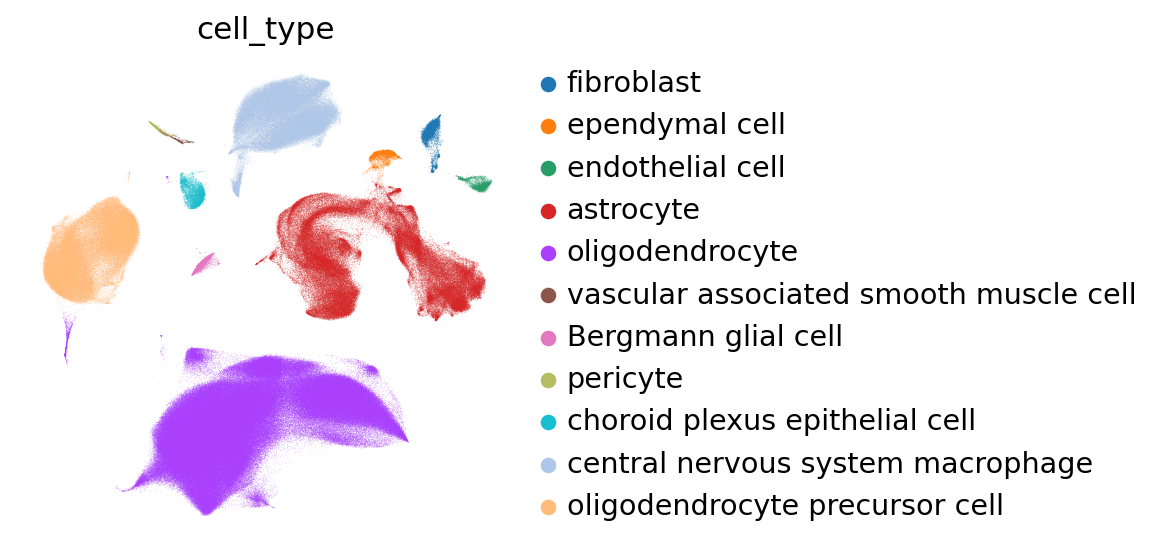

In [8]:
sc.pl.embedding(adata, basis="X_UMAP", color=["cell_type"], frameon=False, ncols=1)

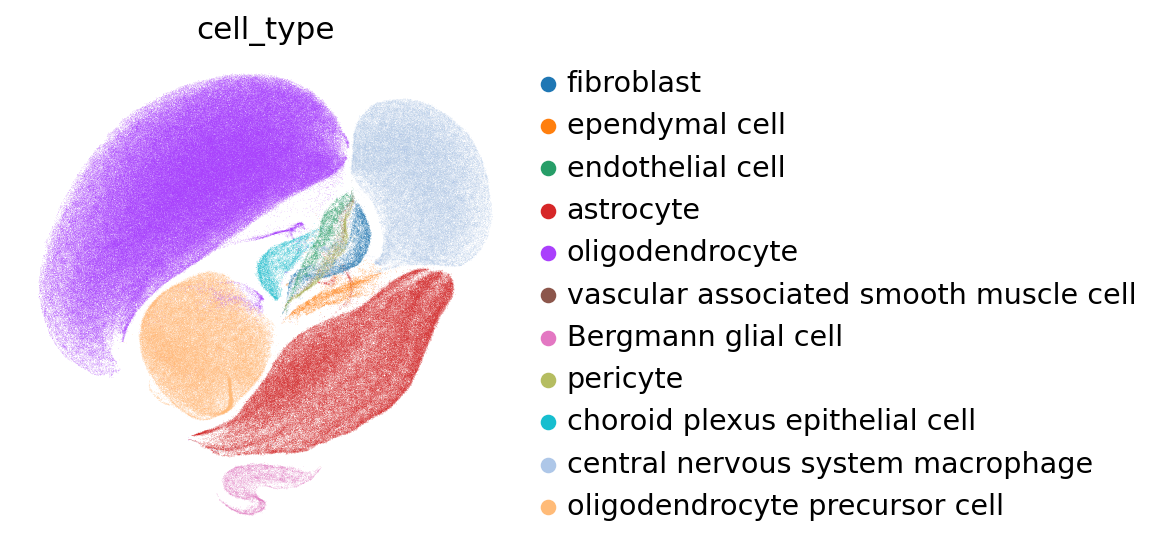

In [15]:
sc.pl.embedding(adata, basis="X_umap", color=["cell_type"], frameon=False, ncols=1)

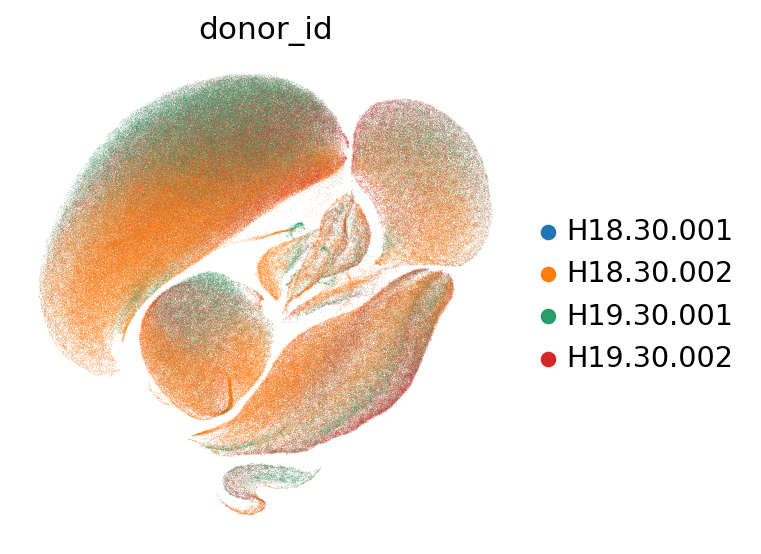

In [17]:
sc.pl.embedding(adata, basis="X_umap", color=["donor_id"], frameon=False, ncols=1)

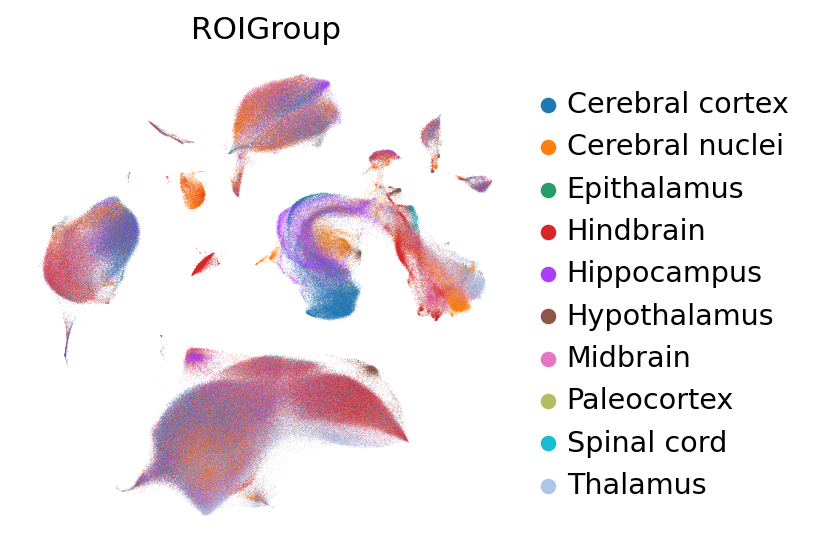

In [9]:
sc.pl.embedding(adata, basis="X_UMAP", color=["ROIGroup"], frameon=False, ncols=1)

In [16]:
# parameter we care about,
# re-annotated by the authors after dataset integration with batch effect removal
for cell_type in adata.obs["cell_type"].unique():
    print("%6d, %s" % ((adata.obs["cell_type"] == cell_type).sum(), cell_type))

print("=" * 77)
print(
    "%6d, in total %s cell types"
    % (len(adata.obs["cell_type"]), len(adata.obs["cell_type"].unique()))
)

 78816, alveolar macrophage
 16978, natural killer cell
 62175, type II pneumocyte
 84713, respiratory basal cell
 12975, vein endothelial cell
 29074, CD8-positive, alpha-beta T cell
  7391, pulmonary artery endothelial cell
  1573, bronchus fibroblast of lung
 21285, CD4-positive, alpha-beta T cell
  7937, type I pneumocyte
 35225, ciliated columnar cell of tracheobronchial tree
  1773, plasma cell
 35833, nasal mucosa goblet cell
 38111, club cell
   556, smooth muscle cell
 17695, classical monocyte
 28223, elicited macrophage
  1417, tracheobronchial serous cell
  8834, non-classical monocyte
 16048, alveolar capillary type 1 endothelial cell
 15503, fibroblast of lung
  4595, endothelial cell of lymphatic vessel
  7157, alveolar capillary type 2 endothelial cell
  2996, tracheobronchial smooth muscle cell
  5873, multi-ciliated epithelial cell
  1670, bronchial goblet cell
   159, lung neuroendocrine cell
  9133, CD1c-positive myeloid dendritic cell
  3975, epithelial cell of lun

    Highly expressive genes

normalizing counts per cell
    finished (0:00:07)


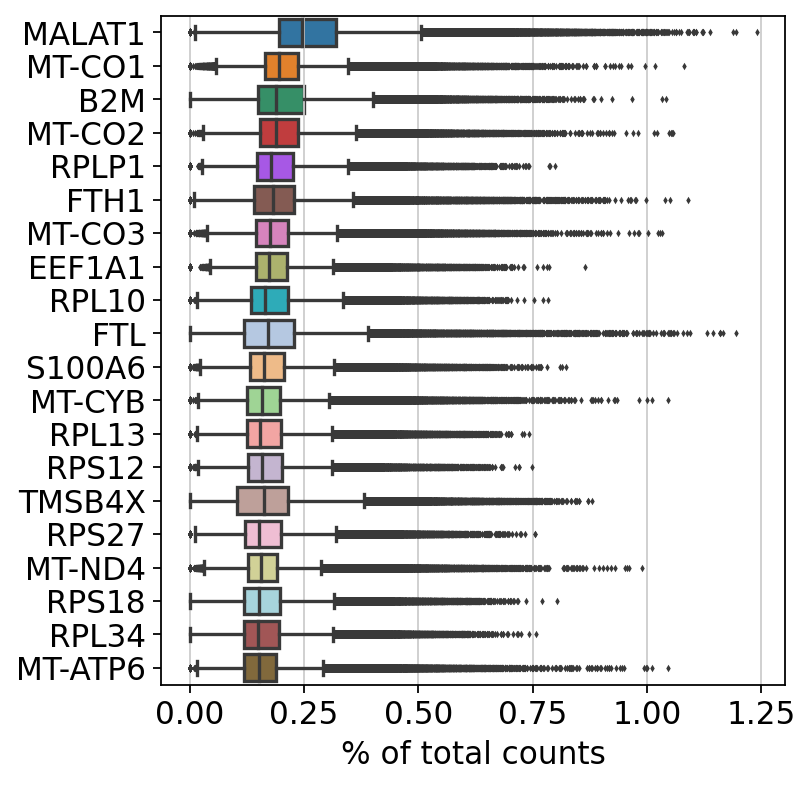

In [17]:
# highly expressive genes
sc.pl.highest_expr_genes(adata, n_top=20, save="_hlca.pdf")

    Apply basic filtering (quality control) -> no drops

    with pre-computed UMAP coordinates

In [29]:
os.makedirs("../res/umap", exist_ok=True)

/home/hanchen/anaconda3/envs/genemetric/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


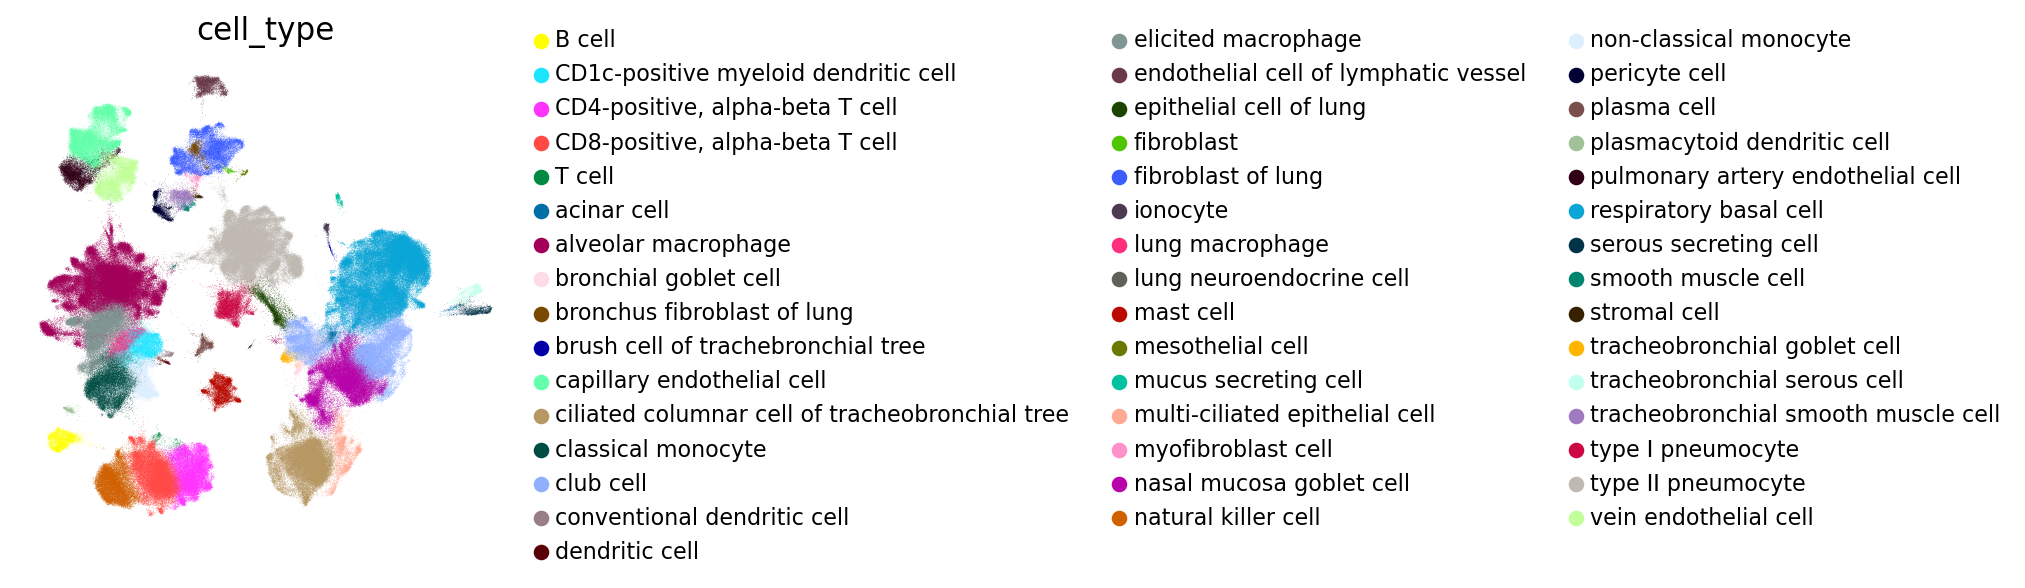

In [30]:
sc.pl.umap(
    adata,
    color="cell_type",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
    save="_integrated_celltype",
)
os.rename("figures/umap_integrated_celltype.pdf", "../res/umap/integrated_celltype.pdf")